In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from sklearn.metrics import r2_score

In [2]:
TEST_CELLS = ['25C05', '25C06', '25C07', '25C08', '35C02', '45C02']

In [3]:
filenames_common = ['EIS_data.txt', 'RUL.txt', 'EIS_data_RUL.txt']
data_common = {}
for fname in filenames_common:
    data_common[fname] = np.loadtxt(fname)

mean = np.mean(data_common['EIS_data.txt'], axis=0)
std = np.std(data_common['EIS_data.txt'], axis=0)
X_train_rul = (data_common['EIS_data_RUL.txt'] - mean) / std
Y_train_rul = data_common['RUL.txt'].reshape(-1, 1)

kernel = GPy.kern.Linear(input_dim=X_train_rul.shape[1])
model = GPy.models.GPRegression(X_train_rul, Y_train_rul, kernel)
model.optimize()

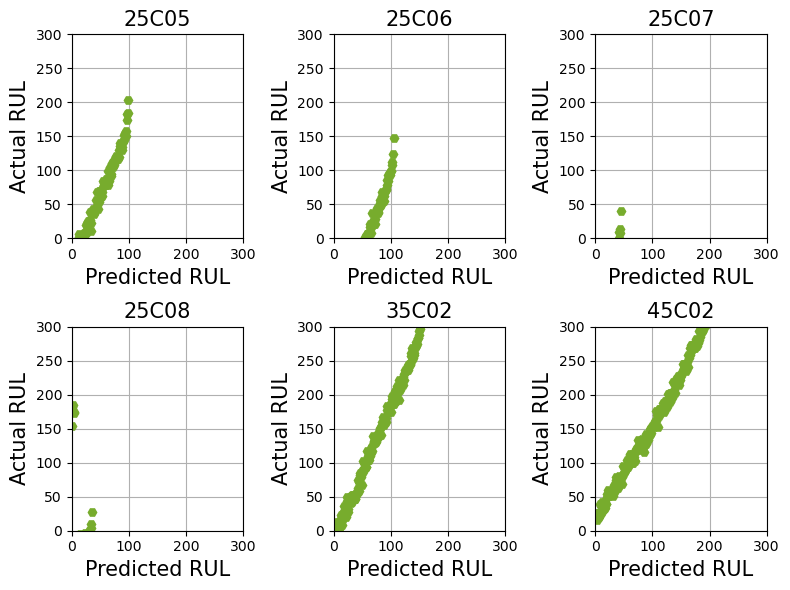

In [4]:
# Set up a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 6))
axs = axs.ravel()

for idx, TEST_CELL in enumerate(TEST_CELLS):
    filenames = [f'EIS_data_{TEST_CELL}.txt', f'rul{TEST_CELL}.txt']
    data = {}
    for fname in filenames:
        data[fname] = np.loadtxt(fname)

    X_test_rul = (data[f'EIS_data_{TEST_CELL}.txt'] - mean) / std
    Y_test_rul, _ = model.predict(X_test_rul)
    
#     # Compute the r2 score
#     r2 = r2_score(data[f'rul{TEST_CELL}.txt'], Y_test_rul)
    
    axs[idx].plot(data[f'rul{TEST_CELL}.txt'], Y_test_rul, 'H',
                  color=[119/255, 172/255, 45/255], markersize=6, 
                  markerfacecolor=[119/255, 172/255, 45/255], linewidth=1)
    axs[idx].set_xlim([0, 300])
    axs[idx].set_ylim([0, 300])
    axs[idx].set_xlabel('Predicted RUL', fontsize=15)
    axs[idx].set_ylabel('Actual RUL', fontsize=15)
    axs[idx].set_title(f'{TEST_CELL}', fontsize=15)
    axs[idx].grid(True)
    
#     # Display the r2 value on the subplot
#     axs[idx].text(10, 270, f'R2 = {r2:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()